In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
import plotly.express as px
import seaborn
import matplotlib.pyplot as plt
import tqdm

### Read data.

In [157]:
weeks_data = []
for week in tqdm.tqdm(range(1,9)):
    weeks_data.append(pd.read_csv(f'data/week{week}.csv'))

100%|███████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.02it/s]


In [30]:
weeks_data[0].head(100
                  )

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021090900,97,35634.0,10,2021-09-10T00:26:32.000,81.0,TB,right,41.54,37.18,2.63,4.41,0.24,106.34,49.19,None
96,2021090900,97,35634.0,11,2021-09-10T00:26:32.100,81.0,TB,right,41.77,37.38,3.14,4.02,0.30,102.33,49.20,None
97,2021090900,97,35634.0,12,2021-09-10T00:26:32.200,81.0,TB,right,42.02,37.59,3.50,3.19,0.33,100.34,48.79,None
98,2021090900,97,35634.0,13,2021-09-10T00:26:32.300,81.0,TB,right,42.34,37.87,4.04,2.98,0.42,101.72,48.83,None


In [31]:
games_data = pd.read_csv(f'data/games.csv')
games_data.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


In [32]:
pff_scouting_data = pd.read_csv(f'data/pffScoutingData.csv')
pff_scouting_data.head(100)

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021090900,349,43293,Pass Block,HB-L,NaN,NaN,NaN,0.0,1.0,0.0,0.0,38588.0,PU,1.0
96,2021090900,349,43424,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2021090900,349,46081,Pass Rush,REO,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2021090900,349,46119,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,35454.0,CL,0.0


In [33]:
pd.DataFrame(pff_scouting_data['pff_role'].value_counts()).reset_index()

,index,pff_role
0,Coverage,57765
1,Pass Block,46057
2,Pass Route,39513
3,Pass Rush,36362
4,Pass,8557


In [34]:
game_id_counts = pd.DataFrame(pff_scouting_data['pff_role'].value_counts()).reset_index()
game_id_counts.rename(columns = {'pff_role':'count', 'index':"player's role on play"}, inplace = True)
game_id_counts

,player's role on play,count
0,Coverage,57765
1,Pass Block,46057
2,Pass Route,39513
3,Pass Rush,36362
4,Pass,8557


In [35]:
game_id_counts.sort_values("count")

,player's role on play,count
4,Pass,8557
3,Pass Rush,36362
2,Pass Route,39513
1,Pass Block,46057
0,Coverage,57765


In [36]:
game_id_counts.dtypes

player's role on play    object
count                     int64
dtype: object

In [37]:
game_id_counts = pd.DataFrame(pff_scouting_data['pff_role'].value_counts()).reset_index()
game_id_counts.rename(columns = {'pff_role':'count', 'index':"player's role on play"}, inplace = True)
# game_id_counts['game_id'] = game_id_counts['game_id'].astype(str)

fig = px.bar(game_id_counts, x='count', y="player's role on play",title="Most frequent player's role in action.")
fig.update_traces(marker_color='green',width=.4)

fig.show()

In [38]:
game_id_counts.dtypes

player's role on play    object
count                     int64
dtype: object

In [39]:
players_data = pd.read_csv(f'data/players.csv')
players_data.head()

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


In [40]:
plays_data = pd.read_csv(f'data/plays.csv')
plays_data.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [ ]:
elected_play_df.absoluteYardlineNumber

In [41]:
joined_all = pd.merge(games_data,plays_data,how="inner",on = "gameId")
joined_all = pd.merge(joined_all,weeks_data[0],how="inner",on=["gameId","playId"])
joined_all = pd.merge(joined_all,players_data,how="left",on = "nflId")
play_focus = 97
focused_df = joined_all[(joined_all.playId==play_focus)]

In [42]:
focused_df

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,playDescription,quarter,...,dis,o,dir,event,height,weight,birthDate,collegeName,officialPosition,displayName
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,0.03,165.16,84.99,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady
1,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,0.02,164.33,92.87,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady
2,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,0.01,160.24,68.55,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady
3,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,0.06,152.13,296.85,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady
4,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,0.04,148.33,287.55,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,0.10,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
985,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,4.19,NaN,NaN,pass_forward,NaN,NaN,NaN,NaN,NaN,NaN
986,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,1.42,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
987,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,...,1.34,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
import plotly.graph_objects as go
fig = go.Figure( layout_yaxis_range=[0,53.3], layout_xaxis_range=[0,120])

colors = {"TB":'#D50A0A',
          "DAL":'#003594',
          "football":'#CBB67C'
        }
for team in focused_df.team.unique():
    plot_df = focused_df[(focused_df.team==team)&(focused_df.frameId==1)]
    fig.add_trace(go.Scatter(x=plot_df["x"], y=plot_df["y"],mode = 'markers',marker_color=colors[team],name=team))
fig.show()


In [44]:
def animate_play(tracking_df, play_df,players,pffScoutingData, gameId,playId):
    selected_play_df = play_df[(play_df.playId==playId)&(play_df.gameId==gameId)].copy()
    
    tracking_players_df = pd.merge(tracking_df,players,how="left",on = "nflId")
    tracking_players_df = pd.merge(tracking_players_df,pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()

    sorted_frame_list = selected_tracking_df.frameId.unique()
    sorted_frame_list.sort()

    # get play General information 
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    first_down_marker = line_of_scrimmage + selected_play_df.yardsToGo.values[0]
    down = selected_play_df.down.values[0]
    quarter = selected_play_df.quarter.values[0]
    gameClock = selected_play_df.gameClock.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    # Handle case where we have a really long Play Description and want to split it into two lines
    if len(playDescription.split(" "))>15 and len(playDescription)>115:
        playDescription = " ".join(playDescription.split(" ")[0:16]) + "<br>" + " ".join(playDescription.split(" ")[16:])

    # initialize plotly start and stop buttons for animation
    updatemenus_dict = [
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 100, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 0}}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                      "mode": "immediate",
                                      "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ]
    # initialize plotly slider to show frame position in animation
    sliders_dict = {
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Frame:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": []
    }


    frames = []
    for frameId in sorted_frame_list:
        data = []
        # Add Numbers to Field 
        data.append(
            go.Scatter(
                x=np.arange(20,110,10), 
                y=[5]*len(np.arange(20,110,10)),
                mode='text',
                text=list(map(str,list(np.arange(20, 61, 10)-10)+list(np.arange(40, 9, -10)))),
                textfont_size = 30,
                textfont_family = "Courier New, monospace",
                textfont_color = "#ffffff",
                showlegend=False,
                hoverinfo='none'
            )
        )
        data.append(
            go.Scatter(
                x=np.arange(20,110,10), 
                y=[53.5-5]*len(np.arange(20,110,10)),
                mode='text',
                text=list(map(str,list(np.arange(20, 61, 10)-10)+list(np.arange(40, 9, -10)))),
                textfont_size = 30,
                textfont_family = "Courier New, monospace",
                textfont_color = "#ffffff",
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Add line of scrimage 
        data.append(
            go.Scatter(
                x=[line_of_scrimmage,line_of_scrimmage], 
                y=[0,53.5],
                line_dash='dash',
                line_color='blue',
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Add First down line 
        data.append(
            go.Scatter(
                x=[first_down_marker,first_down_marker], 
                y=[0,53.5],
                line_dash='dash',
                line_color='yellow',
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Plot Players
        for team in selected_tracking_df.team.unique():
            plot_df = selected_tracking_df[(selected_tracking_df.team==team)&(selected_tracking_df.frameId==frameId)].copy()
            if team != "football":
                hover_text_array=[]
                for nflId in plot_df.nflId:
                    selected_player_df = plot_df[plot_df.nflId==nflId]
                    hover_text_array.append("nflId:{}<br>displayName:{}<br>Position:{}<br>Role:{}".format(selected_player_df["nflId"].values[0],
                                                                                      selected_player_df["displayName"].values[0],
                                                                                      selected_player_df["pff_positionLinedUp"].values[0],
                                                                                      selected_player_df["pff_role"].values[0]))
                data.append(go.Scatter(x=plot_df["x"], y=plot_df["y"],mode = 'markers',marker_color=colors[team],name=team,hovertext=hover_text_array,hoverinfo="text"))
            else:
                data.append(go.Scatter(x=plot_df["x"], y=plot_df["y"],mode = 'markers',marker_color=colors[team],name=team,hoverinfo='none'))
        # add frame to slider
        slider_step = {"args": [
            [frameId],
            {"frame": {"duration": 100, "redraw": False},
             "mode": "immediate",
             "transition": {"duration": 0}}
        ],
            "label": str(frameId),
            "method": "animate"}
        sliders_dict["steps"].append(slider_step)
        frames.append(go.Frame(data=data, name=str(frameId)))

    scale=10
    layout = go.Layout(
        autosize=False,
        width=120*scale,
        height=60*scale,
        xaxis=dict(range=[0, 120], autorange=False, tickmode='array',tickvals=np.arange(10, 111, 5).tolist(),showticklabels=False),
        yaxis=dict(range=[0, 53.3], autorange=False,showgrid=False,showticklabels=False),

        plot_bgcolor='#00B140',
        # Create title and add play description at the bottom of the chart for better visual appeal
        title=f"GameId: {gameId}, PlayId: {playId}<br>{gameClock} {quarter}Q"+"<br>"*19+f"{playDescription}",
        updatemenus=updatemenus_dict,
        sliders = [sliders_dict]
    )

    fig = go.Figure(
        data=frames[0]["data"],
        layout= layout,
        frames=frames[1:]
    )
    # Create First Down Markers 
    for y_val in [0,53]:
        fig.add_annotation(
                x=first_down_marker,
                y=y_val,
                text=str(down),
                showarrow=False,
                font=dict(
                    family="Courier New, monospace",
                    size=16,
                    color="black"
                    ),
                align="center",
                bordercolor="black",
                borderwidth=2,
                borderpad=4,
                bgcolor="#ff7f0e",
                opacity=1
                )
    fig_speed_line = px.line(selected_tracking_df[selected_tracking_df['pff_role'].isin(['Pass Block', 'Pass Rush'])].dropna(subset=['frameId','s','nflId']), 
                             x='frameId', 
                             y='s',
                             color='displayName',
                             line_dash='team')
    return fig, fig_speed_line

In [45]:
fig_anime, fig_speed_line = animate_play(weeks_data[0],plays_data,players_data,pff_scouting_data,2021090900,349)
fig_anime.show()

In [46]:
fig_speed_line.show()

/var/folders/z_/hl22d1b548lbkbb8qm6ppk_h0000gp/T/ipykernel_28825/3862760653.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot: xlabel='x', ylabel='y'>

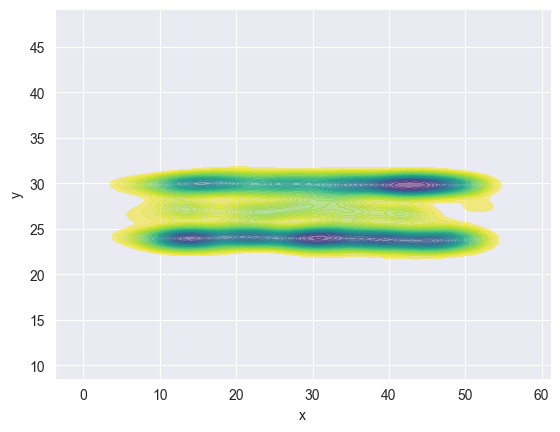

In [107]:
#TESTOWY HEATMAP
sns.set_style("darkgrid")

f, ax = plt.subplots(1)

sns.set_style("darkgrid")
seaborn.kdeplot(
    data=player_df,
    x="x",
    y="y",
    n_levels=50,
    shade=True,
    alpha=0.55,
    cmap="viridis_r",
)
# Add basemap
# contextily.add_basemap(
#     ax, source=contextily.providers.CartoDB.Positron
# )
# Remove axes
# ax.set_axis_off()

## Player season info 

In [169]:
nflId = 25511.0
def get_player_season_info(player_nfl_id:float,show:bool=True):
    player_df = None
    for week in weeks_data:
        player_data = week[week['nflId'] == player_nfl_id]
        if player_data is not None:
            player_df = pd.concat([player_df,player_data])
        else:
            player_df = player_data
    fig = px.ī(player_df,
                         x="x", 
                         y="y", 
                         marginal_x="violin",
                         marginal_y="violin",
                         nbinsx=120,
                         nbinsy=53,
                         range_x=[0,120],
                         range_y=[0,53.3],
                         title='Heatmap of player during the season',
                    
                )
    info = {
        'Avg. Speed':f"{player_df['s'].mean()} y/s",
        'Avg. Acceleration':f"{player_df['a'].mean()} y/s2",
#         'Avg. Distance': f"{player_df['dis'].mean()} yards",
        'Total Distance': f"{player_df['dis'].sum()} yards"
    } 
    if show:
        for item in info.items():
            print(*item)
        fig.show()
    return info,fig
get_player_season_info(35634.0)

Avg. Speed 4.117989597919585 y/s
Avg. Acceleration 2.4152070414082814 y/s2
Total Distance 2050.0699999999997 yards


({'Avg. Speed': '4.117989597919585 y/s',
  'Avg. Acceleration': '2.4152070414082814 y/s2',
  'Total Distance': '2050.0699999999997 yards'},
 Figure({
     'data': [{'coloraxis': 'coloraxis',
               'hovertemplate': 'x=%{x}<br>y=%{y}<br>count=%{z}<extra></extra>',
               'name': '',
               'nbinsx': 120,
               'nbinsy': 53,
               'type': 'histogram2d',
               'x': array([40.99, 40.99, 40.99, ..., 89.57, 89.57, 89.58]),
               'xaxis': 'x',
               'xbingroup': 'x',
               'y': array([36.74, 36.73, 36.74, ..., 46.46, 46.47, 46.48]),
               'yaxis': 'y',
               'ybingroup': 'y'},
              {'alignmentgroup': 'True',
               'hovertemplate': 'x=%{x}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#0d0887'},
               'name': '',
               'offsetgroup': '',
               'scalegroup': 'x',
               'showlegend': False,
               't

In [171]:
get_player_season_info(46119)

Avg. Speed 1.3208869853550704 y/s
Avg. Acceleration 1.038561296859169 y/s2
Total Distance 1490.41 yards


({'Avg. Speed': '1.3208869853550704 y/s',
  'Avg. Acceleration': '1.038561296859169 y/s2',
  'Total Distance': '1490.41 yards'},
 Figure({
     'data': [{'coloraxis': 'coloraxis',
               'hovertemplate': 'x=%{x}<br>y=%{y}<br>count=%{z}<extra></extra>',
               'name': '',
               'nbinsx': 120,
               'nbinsy': 53,
               'type': 'histogram2d',
               'x': array([109.34, 109.34, 109.35, ...,  82.99,  82.88,  82.8 ]),
               'xaxis': 'x',
               'xbingroup': 'x',
               'y': array([22.12, 22.12, 22.11, ..., 25.53, 25.61, 25.7 ]),
               'yaxis': 'y',
               'ybingroup': 'y'},
              {'alignmentgroup': 'True',
               'hovertemplate': 'x=%{x}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#0d0887'},
               'name': '',
               'offsetgroup': '',
               'scalegroup': 'x',
               'showlegend': False,
               'type':